# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Finite difference methods
=========================

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

Background
----------

### Boundary Value Problems

Considering simple boundary value problem

$$y'' = f(x, y, y'), \quad y(a) = A, \,\, y(b) = B, \quad x \in [a,b].$$

Boundary conditions are only examples here.

Standard approach: first try *shooting* method. Convert BVP to IVP with
some initial data free. Free data then modified, using root finding, to
satisfy boundary conditions.

Shooting is straightforward and efficient – when it works. Otherwise use
*relaxation* methods based on *finite differences*.

Finite differences for linear problems
--------------------------------------

### The linear problem

Consider the linear problem

$$y'' + p(x) y' + q(x) y =  f(x), \quad y(a) = A, \,\, y(b) = B,
\quad x \in [a,b].$$

Introduce a *grid*, evenly spaced over the interval,

$$x_i = a + i h, \quad i = 0, 1, \dots, n + 1, \quad h = \frac{b -
a}{n + 1}.$$

Contains $n$ *interior* points and 2 boundary points. The value of $y$
at the boundary points given by boundary conditions,

$$\begin{aligned}
  y_0 & = y(a) = A, \\
  y_{n+1} & = y(b) = B.
\end{aligned}$$

Value of $y$ at interior points unknown; these give approximate
solution. Require approximation to converge to true solution as
$h \rightarrow 0$.

### Finite differences

Given grid $\{x_j\}$, approximate derivatives using standard finite
difference formulas. Typically use centred differencing formulas

$$\begin{aligned}
  y' (x_i) & = \frac{y_{i+1} - y_{i-1}}{2 h} + {\cal O} (h^2), \\
  y'' (x_i) & = \frac{y_{i+1} + y_{i-1} - 2 y_i}{h^2} + {\cal O} (h^4),
\end{aligned}$$

which are second order accurate.

Substituting into BVP equation

$$y'' + p(x) y' + q(x) y =  f(x), \quad y(a) = A, \,\, y(b) = B,
\quad x \in [a,b]$$

for *interior* points gives finite difference formula ($q_i =
  q(x_i)$ etc.)

$$y_{i-1} \left( 1 - \tfrac{h}{2} p_i \right) +  y_{i} \left( h^2
q_i - 2 \right) + y_{i+1} \left( 1 + \tfrac{h}{2} p_i \right) =
h^2 f_i.$$

### Constructing the linear system

Have a system of ($n+2$) linear algebraic equations

$$\begin{aligned}
y_0 & = A, \\
y_{i-1} \left( 1 - \tfrac{h}{2} p_i \right) +  y_{i} \left( h^2
  q_i - 2 \right) + y_{i+1} \left( 1 + \tfrac{h}{2} p_i \right) & =
h^2 f_i, \quad 1 \le i \le n \\
y_{n+1} & = B.
\end{aligned}$$

This is a linear system. Can simplify using the boundary conditions to
eliminate $y_0, y_{n+1}$ everywhere.

Take $n=3$ for example. In the interior

$$\begin{pmatrix}
\dots & \dots & \dots \\
1 - \tfrac{h}{2} p_2 & -2 + h^2 q_2 & 1 + \tfrac{h}{2} p_2 \\
\dots & \dots & \dots
\end{pmatrix}
\begin{pmatrix}
  y_1 \\ y_2 \\ y_3
\end{pmatrix} =
\begin{pmatrix}
  \dots \\ h^2 f_2 \\ \dots
\end{pmatrix}.$$

Using boundary conditions replace $y_0, y_{n+1}$. Full system is

$$\begin{pmatrix}
-2 + h^2 q_1 & 1 + \tfrac{h}{2} p_1 & 0 \\
1 - \tfrac{h}{2} p_2 & -2 + h^2 q_2 & 1 + \tfrac{h}{2} p_2 \\
0 & 1 - \tfrac{h}{2} p_3 & -2 + h^2 q_3
\end{pmatrix}
\begin{pmatrix}
  y_1 \\ y_2 \\ y_3
\end{pmatrix} =
\begin{pmatrix}
  h^2 f_1 - A ( 1 - \tfrac{h}{2} p_1 ) \\ h^2 f_2
  \\ h^2 f_3 - B ( 1 + \tfrac{h}{2} p_3 )
\end{pmatrix}.$$

### Points about the linear system

Important point: provided central differencing is used, the matrix is
*tridiagonal*. Very efficient algorithms for solving the linear system.

Also note that here the matrix $T$ is not modified by the boundary
conditions. Always true for Dirichlet type conditions which fix $y(a)$.
Not true for Neumann type conditions which fix $y'(a)$, for example.

### Example

For the problem

$$y'' + y' + 1 = 0, \quad y(0) = 0, \,\, y(1) = 1, \quad x \in [0, 1]$$

we have $p(x) = 1$, $q(x) = 0$, $f(x) = -1$. Look at grid with 3 points
($n = 1, h = 1/2$). Gives the equations

$$\begin{aligned}
y_0 & = 0, \\
y_0 \left( 1 - \tfrac{h}{2} \cdot 1 \right) + y_1 \left( h^2 \cdot
  0 - 2 \right) + y_2 \left( 1 + \tfrac{h}{2} \cdot 1 \right) & =
h^2 \cdot (-1), \\
y_2 & = 1.
  \end{aligned}$$

Boundary points $y_0, y_2$ given by boundary conditions and are exact.
Central point $y_1$ has value

$$y_1 = \tfrac{3}{4}; \quad y_e(x = 1/2) = 0.74492.$$

Good accuracy for such a coarse grid, as $y_e(x)$ close to linear.

The problem

$$\begin{aligned}
y'' + y' + 1 &= 0, \\ y(0) &= 0, \\ y(1) &= 1, \\ x &\in [0, 1]
\end{aligned}$$

solved with finite differences is impressively accurate.

Increase $n$ the result converges well.

The convergence is second order in $h$.

/Users/ih3/anaconda/lib/python3.4/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:90: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


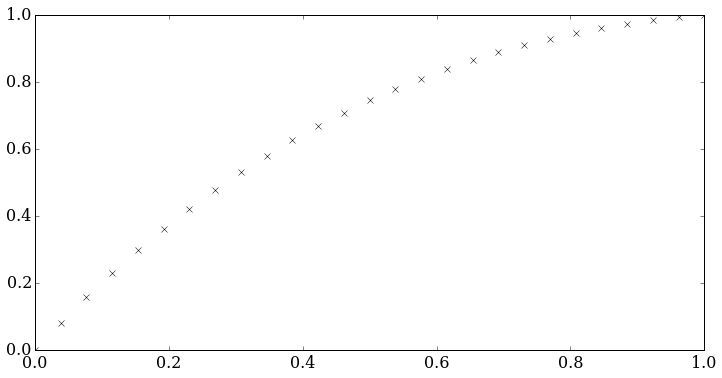

In [3]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
def p(x):
    return np.ones_like(x)
def q(x):
    return np.zeros_like(x)
def f(x):
    return -np.ones_like(x)
y_bc = [0.0, 1.0]

def y_exact(x):
    return 2.0 * np.exp(1.0) / (np.exp(1.0) - 1.0) * (1.0 - np.exp(-x)) - x

N = 25
x = np.linspace(0.0, 1.0, N+2)
h = x[1] - x[0]
A_diag = h**2 * q(x[1:-1]) - 2.0
A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(N,N))
b = h**2 * f(x[1:-1])
b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
b[-1] -= y_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

y_int = spsolve(A, b)
y = np.hstack((0.0, y_int, 1.0))
plt.plot(x, y, 'kx')
plt.show()

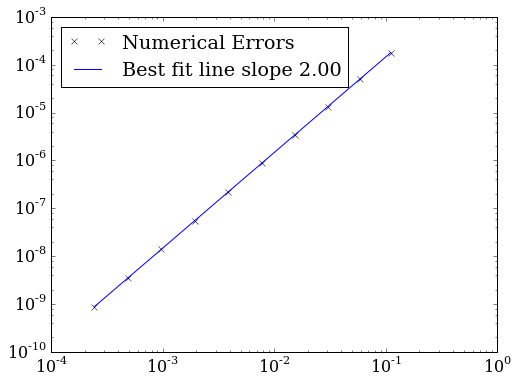

In [4]:
from scipy.linalg import norm

Npoints = [2**i for i in range(3, 13)]
hh = 1.0 / (np.array(Npoints) + 1.0)
fd_error = np.zeros_like(hh)

for i in range(len(Npoints)):
    x = np.linspace(0.0, 1.0, Npoints[i]+2)
    h = x[1] - x[0]
    A_diag = h**2 * q(x[1:-1]) - 2.0
    A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
    A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

    A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(Npoints[i],Npoints[i]))
    b = h**2 * f(x[1:-1])
    b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
    b[-1] -= y_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

    y_int = spsolve(A, b)
    y_e = y_exact(x[1:-1])
    fd_error[i] = norm(y_int - y_e, 2) * np.sqrt(h) # Remember the definition of finite difference error norms!
    
fit = np.polyfit(np.log(hh), np.log(fd_error), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(hh, fd_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(hh, np.exp(fit[1])*hh**(fit[0]), 'b-', label=fitlabel)
ax.legend(loc=2)
plt.show()

Boundary conditions
-------------------

When constructing the linear system

$$T {\boldsymbol{y}} = {\boldsymbol{F}}$$

using Dirichlet type boundary conditions, could give value of $y_0,
  y_{n+1}$ everywhere; this only modified ${\boldsymbol{F}}$.

 If instead have Neumann type boundary conditions, e.g.
$y'(b) = \alpha$, the situation changes.  First need
finite difference approximation of *boundary condition itself*.

For example could use first order differencing:

$$\frac{y_{n+1} - y_n}{h} = \alpha.$$


Then rearrange to find condition on boundary point $y_{n+1}$:

$$y_{n+1} = y_n + h \alpha.$$


$$y'(b) = \alpha \rightarrow y_{n+1} = y_n + h \alpha.$$

Note that

1.  The value of $y_{n+1}$ is now *not exact* as we specify it by finite differences.

     $$y'(b) = \alpha \rightarrow y_{n+1} = y_n + h \alpha.$$

2.  Use condition on $y_{n+1}$ to construct the linear system, giving new terms including $y_n$; hence matrix $T$ is modified as well as ${\boldsymbol{F}}$.

### Example

For the problem

$$y'' + y' + 1 = 0, \quad y(0) = 0, \,\, y'(1) = \tfrac{3 - e}{e -
1}, \quad x \in [0, 1]$$

have same solution as before. Look at grid with 3 points ($n
  = 1, h = 1/2$). Gives equations (two match Dirichlet case)

$$\begin{aligned}
y_0 & = 0, \\
y_0 \left( 1 - \tfrac{h}{2} \cdot 1 \right) + y_1 \left( h^2 \cdot
  0 - 2 \right) + y_2 \left( 1 + \tfrac{h}{2} \cdot 1 \right) & =
h^2 \cdot (-1), \\
y_2 & = y_1 + h \tfrac{3 - e}{e - 1}.
  \end{aligned}$$

Substituting in expressions for $y_0, y_2$, find central point $y_1$ has
value

$$\begin{aligned}
&&    y_1 & = \tfrac{1}{3} + \tfrac{5 \alpha}{6} = 0.470; &  y_e(x =
1/2) &= 0.74492. \\
\Rightarrow && y_2 &= 0.470 + h \alpha = 0.552; & y_e(x =
1) &= 1.
  \end{aligned}$$

This result is much worse than the Dirichlet case.

### Example: 2

The approximate solution to

$$\begin{aligned}
y'' + y' + 1 &= 0, \\ y(0) &= 0, \\ y'(1) &= \tfrac{3 - e}{e -
1}, \\ x &\in [0, 1]
\end{aligned}$$

is not as good as Dirichlet case.

Increasing $n$ the result converges eventually.

Convergence only first order in $h$.

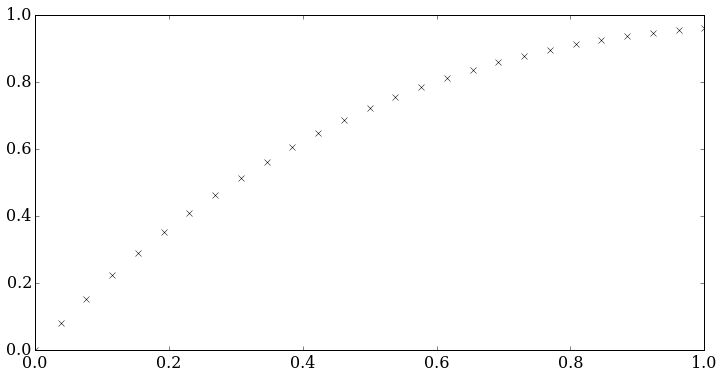

In [5]:
dy_bc = [0.0, (3.0 - np.exp(1.0)) / (np.exp(1.0)- 1.0)] # Derivative at 0 is not needed here, so the value is incorrect but wrong.

N = 25
x = np.linspace(0.0, 1.0, N+2)
h = x[1] - x[0]
A_diag = h**2 * q(x[1:-1]) - 2.0
A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

A_diag[-1] += 1.0 + h / 2.0 * p(x[-2]) # Neumann BC changes matrix
A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(N,N))
b = h**2 * f(x[1:-1])
b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
b[-1] -= h * dy_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

y_int = spsolve(A, b)
y = np.hstack((0.0, y_int, y_int[-1] + h * dy_bc[1]))
plt.plot(x, y, 'kx')
plt.show()

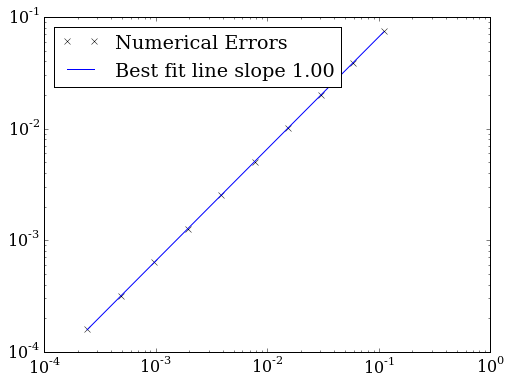

In [6]:
Npoints = [2**i for i in range(3, 13)]
hh = 1.0 / (np.array(Npoints) + 1.0)
fd_error = np.zeros_like(hh)

for i in range(len(Npoints)):
    x = np.linspace(0.0, 1.0, Npoints[i]+2)
    h = x[1] - x[0]
    A_diag = h**2 * q(x[1:-1]) - 2.0
    A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
    A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

    A_diag[-1] += 1.0 + h / 2.0 * p(x[-2]) # Neumann BC changes matrix
    A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(Npoints[i],Npoints[i]))
    b = h**2 * f(x[1:-1])
    b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
    b[-1] -= h * dy_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

    y_int = spsolve(A, b)
    y_num = np.hstack((y_int, y_int[-1] + h * dy_bc[1]))
    y_e = y_exact(x[1:])
    fd_error[i] = norm(y_num - y_e, 2) * np.sqrt(h) # Remember the definition of finite difference error norms!
    
fit = np.polyfit(np.log(hh), np.log(fd_error), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(hh, fd_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(hh, np.exp(fit[1])*hh**(fit[0]), 'b-', label=fitlabel)
ax.legend(loc=2)
plt.show()

### Example: 3

Take same problem

$$\begin{aligned}
y'' + y' + 1 &= 0, \\ y(0) &= 0, \\ y'(1) &= \tfrac{3 - e}{e -
1}, \\ x &\in [0, 1]
\end{aligned}$$

using second order approximation to derivative in boundary condition
gives better results.

Increasing $n$ the result converges faster.

Convergence is second order in $h$.

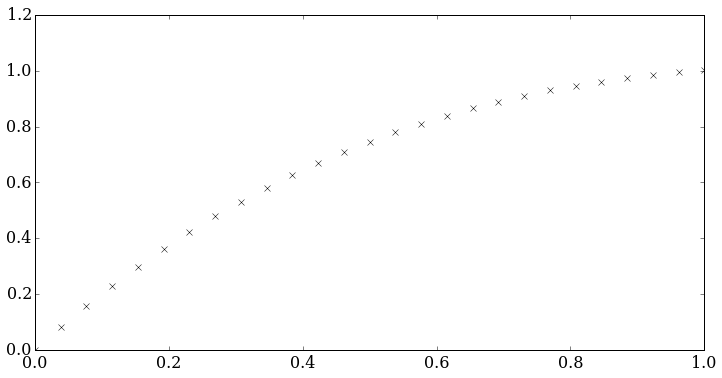

In [7]:

N = 25
x = np.linspace(0.0, 1.0, N+2)
h = x[1] - x[0]
A_diag = h**2 * q(x[1:-1]) - 2.0
A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

A_diag[-1] += 4.0 / 3.0 * (1.0 + h / 2.0 * p(x[-2])) # Neumann BC changes matrix
A_subdiag[-1] -= 1.0 / 3.0 * (1.0 + h / 2.0 * p(x[-2])) # Neumann BC changes matrix
A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(N,N))
b = h**2 * f(x[1:-1])
b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
b[-1] -= 2.0 / 3.0 * h * dy_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

y_int = spsolve(A, b)
y = np.hstack((0.0, y_int, 1.0 / 3.0 * (4.0 * y_int[-1] - y_int[-2] + 2.0 * h * dy_bc[1])))
plt.plot(x, y, 'kx')
plt.show()

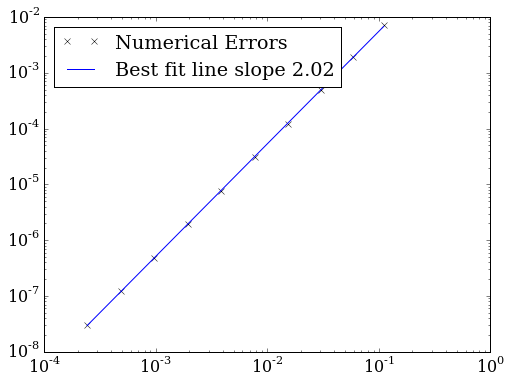

In [8]:
Npoints = [2**i for i in range(3, 13)]
hh = 1.0 / (np.array(Npoints) + 1.0)
fd_error = np.zeros_like(hh)

for i in range(len(Npoints)):
    x = np.linspace(0.0, 1.0, Npoints[i]+2)
    h = x[1] - x[0]
    A_diag = h**2 * q(x[1:-1]) - 2.0
    A_subdiag = 1.0 - h / 2.0 * p(x[2:-1]) 
    A_supdiag = 1.0 + h / 2.0 * p(x[1:-2]) 

    A_diag[-1] += 4.0 / 3.0 * (1.0 + h / 2.0 * p(x[-2])) # Neumann BC changes matrix
    A_subdiag[-1] -= 1.0 / 3.0 * (1.0 + h / 2.0 * p(x[-2])) # Neumann BC changes matrix
    A = diags([A_subdiag, A_diag, A_supdiag], [-1, 0, 1], shape=(Npoints[i],Npoints[i]))
    b = h**2 * f(x[1:-1])
    b[0] -= y_bc[0] * (1.0 - h / 2.0 * p(x[1]))
    b[-1] -= 2.0 / 3.0 * h * dy_bc[1] * (1.0 + h / 2.0 * p(x[-2]))

    y_int = spsolve(A, b)
    y_num = np.hstack((y_int, 1.0 / 3.0 * (4.0 * y_int[-1] - y_int[-2] + 2.0 * h * dy_bc[1])))
    y_e = y_exact(x[1:])
    fd_error[i] = norm(y_num - y_e, 2) * np.sqrt(h) # Remember the definition of finite difference error norms!
    
fit = np.polyfit(np.log(hh), np.log(fd_error), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(hh, fd_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(hh, np.exp(fit[1])*hh**(fit[0]), 'b-', label=fitlabel)
ax.legend(loc=2)
plt.show()

Error analysis
--------------

Central differencing methods normally converge at second order. Examples
above suggest second order convergence for the BVP.

Define error vector ${\boldsymbol{e}}$ and look at linear system $T
  {\boldsymbol{e}}$:

$$\begin{aligned}
\left( y(x_{i-1}) - y_{i-1} \right)& \left( 1 - \tfrac{h}{2} p_i
\right) - \\
\left( y(x_{i}) - y_{i} \right) & \left( 2 - h^2 q_i \right) + \\
\left( y(x_{i+1}) - y_{i+1} \right) & \left( 1 + \tfrac{h}{2} p_i
\right) 
  \end{aligned}$$

for the interior entries.

Numerical terms ($y_i$ etc.) give $-h^2 f_i$. Taylor expanding exact
solution $y(x_i)$ gives original ODE (times $h^2$) plus terms
$\propto h^4$ and higher order in $h$, as all other terms cancel.

Hence error also satisfies a linear system

$$T {\boldsymbol{e}} = h^4 {\boldsymbol{G}}$$

where $T$ is the same tridiagonal matrix that defines the method and
${\boldsymbol{G}}$ is independent of $h$.

Hence bound the error using

$$\begin{aligned}
\| {\boldsymbol{e}} \| & = h^4 \| T^{-1} \| \cdot \| {\boldsymbol{G}} \| \\
& \le h^4 G \| T^{-1} \|
  \end{aligned}$$

as ${\boldsymbol{G}}$ is a constant vector. As $T$ is a matrix of size
$n \propto h^{-1}$ the best bound is

$$\| T^{-1} \| \le K n^2 \quad \implies \quad
\| {\boldsymbol{e}} \| \le \alpha h^2, \quad \alpha \text{ const.}$$

Nonlinear problems
==================

In linear case

$$y'' + p(x) y' + q(x) y =  f(x), \quad y(a) = A, \,\, y(b) = B,
\quad x \in [a,b]$$
have approximate solution on grid after solving one linear system. In
nonlinear case

$$y'' = f(x, y, y'), \quad y(a) = A, \,\, y(b) = B, \quad x \in [a,b]$$

as the $f$ depends on unknowns cannot directly write BVP as a linear
system.

Instead guess solution ${\boldsymbol{y}}^{(k)}$. Then compute $f$ on
grid using old guess ${\boldsymbol{y}}^{(k)}$ which is *known*, giving
linear system for ${\boldsymbol{y}}^{(k+1)}$.

This process of computing a sequence of guesses, each of which requires
the solution of a linear system, is called *relaxation*.

### Newton relaxation

Approximate nonlinear problem using

$$y_{i-1} + y_{i+1} - 2 y_i - h^2 f \left( x_i, y_i, \frac{y_{i+1} -
y_{i-1}}{2 h} \right) = r_i.$$

The $r_i$ are the *residuals* to minimize. Nonlinear root finding
problem – ${\boldsymbol{r}}$ is a function of ${\boldsymbol{y}}$, want
to solve ${\boldsymbol{r}}({\boldsymbol{y}}) = {\boldsymbol{0}}$.

Imagine doing Newton’s method

$${\boldsymbol{y}}^{(k+1)} = {\boldsymbol{y}}^{(k)} - \frac{{\boldsymbol{r^{(k)}}}}{{\boldsymbol{r^{(k)}}}'}.$$

Meaningless as a vector equation. The equivalent is

$$\frac{\partial{r_i^{(k)}}}{\partial{y_j^{(k)}}} \left( {\boldsymbol{y}}^{(k+1)} - {\boldsymbol{y}}^{(k)} \right) = -
{\boldsymbol{r^{(k)}}}.$$


$$\frac{\partial{r_i^{(k)}}}{\partial{y_j^{(k)}}} \left( {\boldsymbol{y}}^{(k+1)} - {\boldsymbol{y}}^{(k)} \right) = -
{\boldsymbol{r^{(k)}}}.$$

This is the linear system

$$J^{(k)} {\boldsymbol{c}}^{(k)} = - {\boldsymbol{r}}^{(k)}$$

where $J$ is the Jacobian matrix, ${\boldsymbol{c}}$ the correction,
giving

$${\boldsymbol{y}}^{(k+1)} = {\boldsymbol{y}}^{(k)} + {\boldsymbol{c}}^{(k)}.$$

### The algorithm

Construct initial guess ${\boldsymbol{y}}^{(0)}$ (conventionally zero).
Then iteratively

1.  construct the residual

    $$r^{(k)}_i = y^{(k)}_{i-1} + y^{(k)}_{i+1} - 2 y^{(k)}_i - h^2 f
      \left( x_i, y^{(k)}_i, \frac{y^{(k)}_{i+1} - y^{(k)}_{i-1}}{2 h}
      \right),$$
      
2.  construct the Jacobian

    $$J^{(k)} = \frac{\partial{r_i^{(k)}}}{\partial{y_j^{(k)}}},$$
    
3.  construct the correction ${\boldsymbol{c}}$ by solving

    $$J^{(k)} {\boldsymbol{c}}^{(k)} = - {\boldsymbol{r}}^{(k)},$$

4.  construct the new guess by
    
    $${\boldsymbol{y}}^{(k+1)} = {\boldsymbol{y}}^{(k)} + {\boldsymbol{c}}^{(k)}.$$


Repeat until the correction is sufficiently small.

### The Jacobian

Choosing central differencing the Jacobian

$$J^{(k)} = \frac{\partial{r_i^{(k)}}}{\partial{y_j^{(k)}}}$$

is also tridiagonal, as

$$\frac{\partial{r_i}}{\partial{y_j}} = \left\{
\begin{aligned}
  1 + \tfrac{h}{2} \frac{\partial{f}}{\partial{y'}} (y_{i-1}) && j & = i - 1, \\
  -2 - h^2 \frac{\partial{f}}{\partial{y}} (y_{i}) && j & = i, \\
  1 - \tfrac{h}{2} \frac{\partial{f}}{\partial{y'}} (y_{i+1}) && j & = i + 1.
\end{aligned} \right.$$

Hence solution of each individual system is still very efficient.

Taking advantage of structure, there are Gauss-Seidel and SOR variants
of iterative scheme. Can either accelerate convergence or improve
stability in particular cases.

### Example

In the problem

$$\begin{aligned}
y'' & = - \frac{1}{1 + y^2}, \\ y(0) &= 0, \\ y(1) &= 0, \\ x
&\in [0, 1] 
\end{aligned}$$

use Newton relaxation. Initial guess trivial.

First iteration already reasonable.

After 4 iterations solution has settled down.

Summary
=======

-   First shoot, then relax.

-   Finite difference methods are typically less accurate and efficient,
and for nonlinear problems are more complex to implement. However,
they are much more likely to work in complex cases.
-   For linear problems finite difference methods convert the ODE to a
linear system $T {\boldsymbol{y}} = {\boldsymbol{F}}$.
-   The matrix will be tri-diagonal (when using centred
    differencing).
-   The boundary conditions are normally directly encoded in the
    known vector ${\boldsymbol{b}}$ (but more complex boundary
    conditions may require modification of $A$ as well).
-   For nonlinear problems we construct a sequence of guesses
${\boldsymbol{y}}^{(n)}$ that converge to the solution; the previous
guess is used to solve a linear system.